# Phân lớp hoa Iris bằng phương pháp cực tiểu chi phí phân lớp sai

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets                          # lấy dữ liệu
from sklearn.model_selection import train_test_split  # chia dữ liệu ra thành tập train và tập test
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

#load dữ liệu
data = datasets.load_iris()
X, y = data.data, data.target
# với tập train là 75% dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state =0 )
X_train.shape

(112, 4)

### Tổ chức lại dữ liệu
Mỗi record bao gồm 4 thông số độ dài và thông số nhãn (0,1,2)

In [2]:
train_X = np.concatenate((X_train, y_train.reshape((y_train.shape[0],1))),axis=1)
#train_X = train.to_numpy()[:,1:]
X_0 = train_X[train_X[:,-1] == 0]
X_1 = train_X[train_X[:,-1] == 1]
X_2 = train_X[train_X[:,-1] == 2]
train_X = [X_0, X_1, X_2]
train_X


[array([[4.700, 3.200, 1.300, 0.200, 0.000],
        [5.000, 3.500, 1.600, 0.600, 0.000],
        [5.400, 3.700, 1.500, 0.200, 0.000],
        [4.800, 3.100, 1.600, 0.200, 0.000],
        [5.300, 3.700, 1.500, 0.200, 0.000],
        [4.300, 3.000, 1.100, 0.100, 0.000],
        [5.400, 3.400, 1.700, 0.200, 0.000],
        [5.700, 4.400, 1.500, 0.400, 0.000],
        [4.600, 3.100, 1.500, 0.200, 0.000],
        [4.600, 3.400, 1.400, 0.300, 0.000],
        [4.800, 3.000, 1.400, 0.100, 0.000],
        [5.100, 3.800, 1.600, 0.200, 0.000],
        [4.800, 3.400, 1.600, 0.200, 0.000],
        [4.500, 2.300, 1.300, 0.300, 0.000],
        [4.900, 3.000, 1.400, 0.200, 0.000],
        [4.400, 3.200, 1.300, 0.200, 0.000],
        [5.000, 3.600, 1.400, 0.200, 0.000],
        [5.100, 3.500, 1.400, 0.300, 0.000],
        [4.400, 3.000, 1.300, 0.200, 0.000],
        [5.400, 3.900, 1.700, 0.400, 0.000],
        [5.100, 3.500, 1.400, 0.200, 0.000],
        [4.900, 3.100, 1.500, 0.200, 0.000],
        [5

### Trực quan hóa dữ liệu bằng nhiều scatter plot

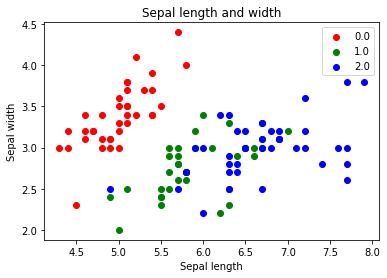

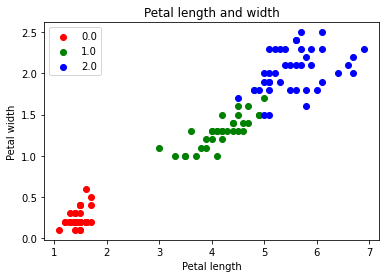

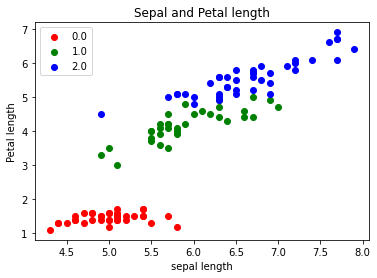

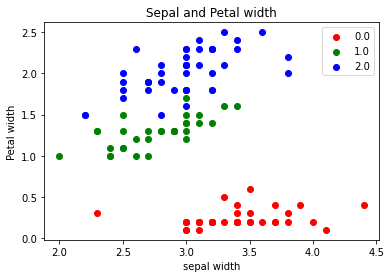

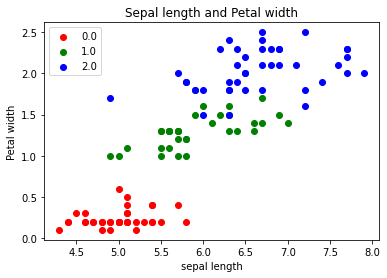

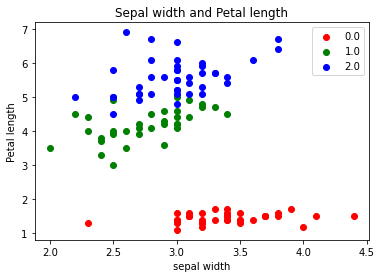

In [3]:
color_map = np.array(['r', 'g', 'b'])
plt.figure(1)
plt.title("Sepal length and width")
plt.ylabel("Sepal width")
plt.xlabel("Sepal length")
for i in range(len(train_X)):
    plt.scatter(train_X[i][:,0], train_X[i][:,1], c=color_map[i], label=train_X[i][0,4])
plt.legend()
    
plt.figure(2)
plt.title("Petal length and width")
plt.ylabel("Petal width")
plt.xlabel("Petal length")
for i in range(len(train_X)):
    plt.scatter(train_X[i][:,2], train_X[i][:,3], c=color_map[i], label=train_X[i][0,4])
plt.legend()
    
plt.figure(3)
plt.title("Sepal and Petal length")
plt.ylabel("Petal length")
plt.xlabel("sepal length")
for i in range(len(train_X)):
    plt.scatter(train_X[i][:,0], train_X[i][:,2], c=color_map[i], label=train_X[i][0,4])
plt.legend()
    
plt.figure(4)
plt.title("Sepal and Petal width")
plt.ylabel("Petal width")
plt.xlabel("sepal width")
for i in range(len(train_X)):
    plt.scatter(train_X[i][:,1], train_X[i][:,3], c=color_map[i], label=train_X[i][0,4])
plt.legend()
    
plt.figure(5)
plt.title("Sepal length and Petal width")
plt.ylabel("Petal width")
plt.xlabel("sepal length")
for i in range(len(train_X)):
    plt.scatter(train_X[i][:,0], train_X[i][:,3], c=color_map[i], label=train_X[i][0,4])
plt.legend()
    
plt.figure(6)
plt.title("Sepal width and Petal length")
plt.ylabel("Petal length")
plt.xlabel("sepal width")
for i in range(len(train_X)):
    plt.scatter(train_X[i][:,1], train_X[i][:,2], c=color_map[i], label=train_X[i][0,4])
plt.legend()

### Tính xác suất tiên nghiệm
xác suất xuất hiện của mỗi lớp là số phần tử tập train thuộc lớp đó chia cho tổng số phần tử tập train

In [4]:
# tính các prior probability
p = []
for i in range(len(train_X)):
    p.append(len(train_X[i])/ len(X_train))
p

[0.33035714285714285, 0.30357142857142855, 0.36607142857142855]

### Tính trung bình mẫu của 4 thông số độ dài theo từng lớp dữ liệu

In [5]:
# tính sample mean
Mean = []
for i in range(len(train_X)):
    Mean.append(np.mean(train_X[i][:,:-1], axis=0))
Mean

[array([4.997, 3.389, 1.454, 0.241]),
 array([5.918, 2.759, 4.191, 1.309]),
 array([6.663, 2.990, 5.583, 2.039])]

### Tính ma trận covariance mẫu theo từng lớp dữ liệu

In [6]:
# tính sample covariance
Cov = []
for i in range(len(train_X)):
    Cov.append(np.cov(train_X[i][:,:-1].T))
Cov

[array([[0.126, 0.101, 0.015, 0.010],
        [0.101, 0.149, 0.014, 0.010],
        [0.015, 0.014, 0.020, 0.006],
        [0.010, 0.010, 0.006, 0.012]]),
 array([[0.273, 0.099, 0.205, 0.067],
        [0.099, 0.115, 0.091, 0.043],
        [0.205, 0.091, 0.228, 0.080],
        [0.067, 0.043, 0.080, 0.042]]),
 array([[0.417, 0.103, 0.319, 0.060],
        [0.103, 0.117, 0.078, 0.050],
        [0.319, 0.078, 0.312, 0.054],
        [0.060, 0.050, 0.054, 0.067]])]

### Hàm discriminant score dùng để tính discriminant score theo lý thuyết


In [7]:
# hàm tính discriminant score
def discriminant_score(x, prior, Mean, Cov):
    score = np.log(prior) - (1.0/2) * np.log(np.linalg.det(Cov)) 
    score -= (1.0/2) * np.dot(np.dot((x - Mean).T, np.linalg.inv(Cov)),(x-Mean))      
    return score

### Thử nghiệm tính discriminant score với class 0 cho 1 biến dữ liệu

In [8]:
dk = discriminant_score([1,2,1,2], p[0], Mean[0], Cov[0])
dk

-294.9105813329697

### thực hiện dự đoán trên tập test
Với mỗi điểm dữ liệu tập test, tính discriminant score cho biến đó với từng class, sau đó gán nhãn dữ liệu đó là class có discriminant score lớn nhất

In [12]:
predict = []
for i in range(len(X_test)):
    dk = []
    for k in range(len(train_X)):
        dk.append(discriminant_score(X_test[i], p[k], Mean[k], Cov[k]))
    max_value = max(dk)
    predict.append(dk.index(max_value))
print(predict)

[2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1, 0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2]


### Nhãn thật sự của tập test

In [13]:
print(y_test)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1]


### Tính độ chính xác bằng cách đếm tổng số mẫu gán nhãn đúng trên toàn bộ mẫu

In [14]:
same = [x for x in range(len(predict)) if predict[x]==y_test[x]]
accuracy = len(same)/len(y_test)
accuracy

0.9736842105263158